## <center> XGBoost model. Tuning and creating submission

In [1]:
%store -r X_train
%store -r X_test

%store -r y_train
%store -r y_test

%store -r X_train_sub
%store -r X_test_sub
%store -r y_train_sub
%store -r y_test_sub

### Import libraries

In [2]:
send_submission = False

In [3]:
__da

/Users/maksymsuprunenko/anaconda3/lib/python3.7/site-packages/tqdm/_tqdm.py:604: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


Basic Data Analysis tools was loaded


In [4]:
import sys
import os
sys.pa### Import libraries

send_submission = False

_dath.append(os.path.realpath('./../../scripts'))

AttributeError: module 'sys' has no attribute 'pa'

In [11]:
import numpy as np
import pandas as pd 

import xgboost as xgb
from xgboost import plot_importance

import warnings
import matplotlib.pyplot as plt
%matplotlib inline 


from IPython.core.debugger import set_trace
from time import time

# SKLEARN

from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit, KFold
from sklearn.metrics import r2_score

import xgboost as xgb

# Bayessian Optimization
from bayes_opt import BayesianOptimization
from hyperopt import hp
from hyperopt import fmin, tpe, space_eval
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

# vecstack
from vecstack import stacking

In [7]:
def get_xgb(params = {}):
    return xgb.XGBRegressor(
           boosting_type= 'gbdt',
           objective = 'reg:squarederror',
           metric = "rmse",
           random_state= 1,
           silent = True,
           **params)

def create_submission(model, submission_name, send_submission=False, message="XGBoost"):
    result = model.predict(X_test_sub)
    submission = pd.DataFrame({
        "ID": np.arange(result.shape[0]), 
        "item_cnt_month": result
    })
    submission.to_csv(submission_name, index=False)
   
    if send_submission:
        !kaggle competitions submit -c competitive-data-science-predict-future-sales -f {submission_name} -m {message}

In [15]:
%%notify -m "Grid search XGBoost was ended"

gridParams = {
    'learning_rate': np.linspace(0.01, 2, 10),
    'max_depth': np.arange(0, 14),
    'n_estimators': np.arange(100, 1000, 100),
    'num_leaves': np.arange(8, 65, 8),
    'colsample_bytree' : [0.65, 0.66],
    'subsample' : np.arange(0.5, 1.1, 0.1),
    'reg_alpha' : np.arange(0, 100),
    'reg_lambda' : np.arange(0, 100),
    'min_weight_sample': np.arange(1, 300, 10)
}

xgb_model = get_xgb()

# Create the grid
grid = RandomizedSearchCV(xgb_model, gridParams, verbose=0, cv=TimeSeriesSplit(n_splits=5), n_iter=50)

grid.fit(X_train, y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, y_train), (X_test, y_test)], 
    verbose=10, 
    early_stopping_rounds=20)

/Users/maksymsuprunenko/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/maksymsuprunenko/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[0]	validation_0-rmse:0.876685	validation_1-rmse:0.905873
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
[10]	validation_0-rmse:0.821289	validation_1-rmse:0.888486
[20]	validation_0-rmse:0.819786	validation_1-rmse:0.905294
Stopping. Best iteration:
[1]	validation_0-rmse:0.84569	validation_1-rmse:0.881617



/Users/maksymsuprunenko/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/maksymsuprunenko/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[0]	validation_0-rmse:0.827052	validation_1-rmse:0.871425
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
[10]	validation_0-rmse:0.772724	validation_1-rmse:0.853944
[20]	validation_0-rmse:0.765336	validation_1-rmse:0.855825
Stopping. Best iteration:
[5]	validation_0-rmse:0.775679	validation_1-rmse:0.846627



/Users/maksymsuprunenko/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/maksymsuprunenko/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[0]	validation_0-rmse:0.980845	validation_1-rmse:1.15738
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
[10]	validation_0-rmse:0.759731	validation_1-rmse:0.927633
[20]	validation_0-rmse:0.748324	validation_1-rmse:0.94735
Stopping. Best iteration:
[2]	validation_0-rmse:0.786052	validation_1-rmse:0.908196



/Users/maksymsuprunenko/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/maksymsuprunenko/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[0]	validation_0-rmse:0.792942	validation_1-rmse:0.788062
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
[10]	validation_0-rmse:0.720719	validation_1-rmse:0.801422


KeyboardInterrupt: 

<IPython.core.display.Javascript object>

In [ ]:
print("Score", grid.best_score_)
print('Fitting with params: ')
print(grid.best_params_)

In [ ]:
rmse =  np.sqrt(mean_squared_error(y_test, grid.best_estimator.predict(X_test))) 
print(f"RMSE {rmse}")

Tuned parameters from RandomizedSearch.

In [17]:
params = {'subsample': 1,
 'reg_lambda': 11,
 'reg_alpha': 32,
 'num_leaves': 40,
 'n_estimators': 10,
 'max_depth': 7,
 'learning_rate': 0.45,
 'colsample_bytree': 0.66}

In [18]:
%%notify -m "XGBoost submission have been fit"

xgb_model = get_xgb(params)
xgb_model.fit(X_train_sub, y_train_sub, 
    eval_metric="rmse", 
    eval_set=[(X_train_sub, y_train_sub)], 
    verbose=10, 
    early_stopping_rounds=20)    

[0]	validation_0-rmse:0.926459
Will train until validation_0-rmse hasn't improved in 20 rounds.
[9]	validation_0-rmse:0.742586


XGBRegressor(base_score=0.5, booster='gbtree', boosting_type='gbdt',
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.66,
             gamma=0, importance_type='gain', learning_rate=0.45,
             max_delta_step=0, max_depth=7, metric='rmse', min_child_weight=1,
             missing=None, n_estimators=10, n_jobs=1, nthread=None,
             num_leaves=40, objective='reg:squarederror', random_state=1,
             reg_alpha=32, reg_lambda=11, scale_pos_weight=1, seed=None,
             silent=True, subsample=1, verbosity=1)

<IPython.core.display.Javascript object>

In [21]:
%%notify -m "Submission was created"
create_submission(xgb_model, 'xgb_submission_gs.csv', True)

100%|███████████████████████████████████████| 3.95M/3.95M [00:04<00:00, 879kB/s]
Successfully submitted to Predict Future Sales

<IPython.core.display.Javascript object>

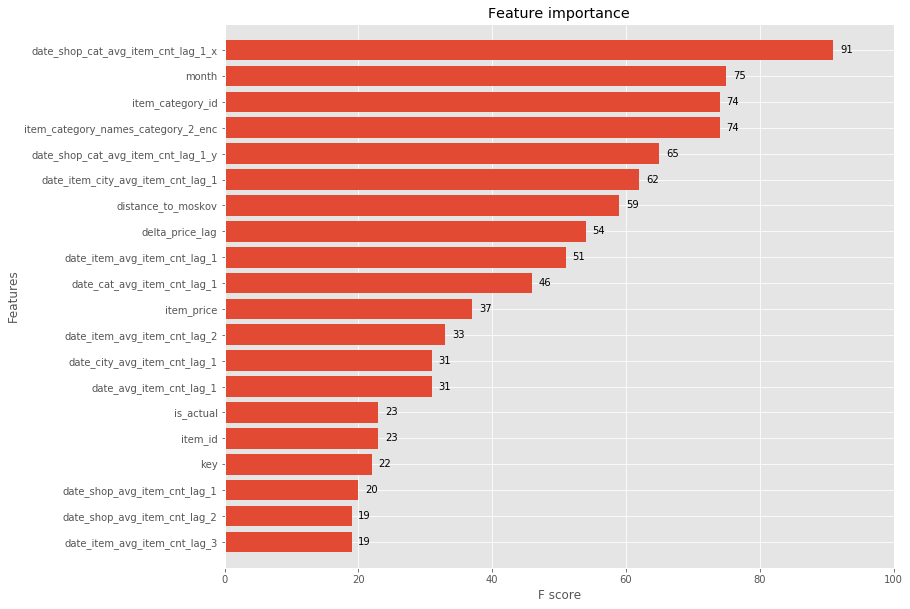

In [23]:
fig, ax = plt.subplots(figsize=(12,10))
xgb.plot_importance(xgb_model, max_num_features=20, height=0.8, ax=ax)
plt.show()

In [32]:
progress

{'validation_0': {'rmse': [0.926459,
   0.863976,
   0.803625,
   0.775995,
   0.766136,
   0.756042,
   0.750563,
   0.74858,
   0.745321,
   0.742586]}}

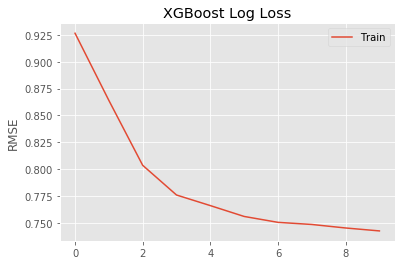

In [36]:
# make predictions for test data
progress = xgb_model.evals_result()
y_pred = xgb_model.predict(X_test)
predictions = np.round(y_pred)
# evaluate predictions
accuracy = np.sqrt( 1/(len(y_test)) * (y_test - predictions)**2)
# retrieve performance metrics
epochs = len(progress['validation_0']['rmse'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, progress['validation_0']['rmse'], label='Train')
#ax.plot(x_axis, progress['train']['rmse'], label='Test')
ax.legend()
plt.ylabel('RMSE')
plt.title('XGBoost Log Loss')
plt.show()

In [37]:
%store xgb_model

Stored 'xgb_model' (XGBRegressor)
